<a href="https://colab.research.google.com/github/wallisonferreira/machine-learning-pavic/blob/main/pytorch_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

# Importações

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

# Dados

In [ ]:
weight = 0.7
bias = 0.3

# create range
start = 0
end = 1
step = 0.02

# create X and y
#X = torch.arange(start, end, step).unsqueeze(dim=1)
X = tf.experimental.numpy.arange(start, end, step)

y = weight * X + bias # gerando nossa saída y (output)

X[:10], y[:10] #imprimir as 10 primeiras amostras

(<tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([0.        , 0.02      , 0.04      , 0.06      , 0.08      ,
        0.09999999, 0.12      , 0.14      , 0.16      , 0.17999999])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([0.3       , 0.314     , 0.328     , 0.342     , 0.356     ,
        0.37      , 0.384     , 0.398     , 0.412     , 0.42599999])>)

In [ ]:
#split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    #plot training data
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    #plot test data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14});

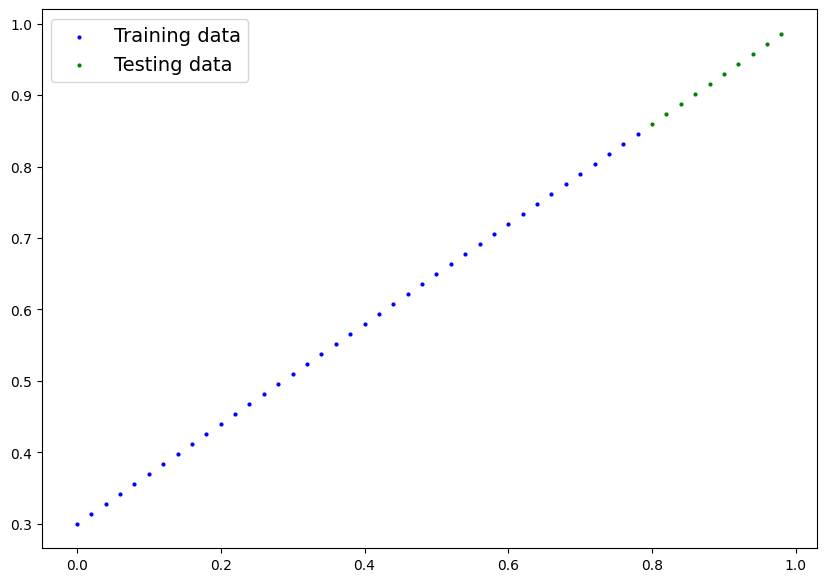

In [ ]:
plot_predictions()

# 1.1 Construir o modelo

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # a partir daqui teremos
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# set model to GPU
model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

# 1.2 Treinar o modelo

In [ ]:
loss_fn = nn.L1Loss() # seta a função de custo (MAE)
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01) # SGD (Stochastic Gradient Descent)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1 forward
    y_pred = model_1(X_train)

    # 2 calcular o loss
    loss = loss_fn(y_pred, y_train)

    # 3 Zero grad optimizer
    optimizer.zero_grad()

    # 4 Loss backward
    loss.backward()

    # 5 Step Optimizer
    optimizer.step()

    ## Testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Teste loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Teste loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Teste loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Teste loss: 0.013801801018416882


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

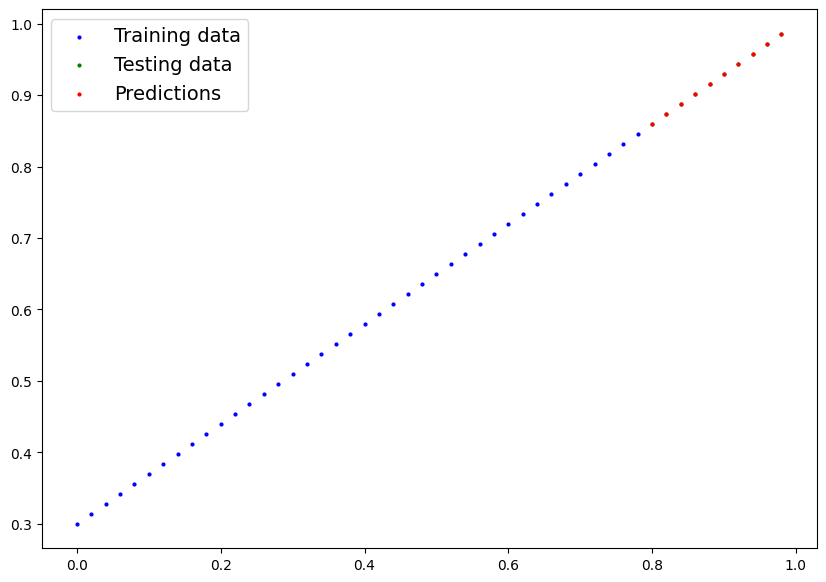

In [ ]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds.cpu())

In [ ]:
# SAVE
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
#LOAD
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict(), model_1.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]))

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Tensorflow

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# construa o modelo
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile o modelo
model_tf.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# treine o modelo
model_tf.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 0.8226 - mae: 0.8226
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7979 - mae: 0.7979
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.7733 - mae: 0.7733
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7486 - mae: 0.7486
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7240 - mae: 0.7240
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6993 - mae: 0.6993
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6744 - mae: 0.6744
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6494 - mae: 0.6494
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6245 - mae: 0.6245
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5997 - mae: 0.5997
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5748

In [ ]:
model_tf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_tf.variables, "#"*50, model_tf.weights

([<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.26267874]], dtype=float32)>,
  <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.53645873], dtype=float32)>],
 '##################################################',
 [<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.26267874]], dtype=float32)>,
  <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.53645873], dtype=float32)>])

# Trabalhando com dados das aulas anteriores

In [1]:
import os
os.makedirs('utils_ex', exist_ok=True)
!wget -q https://github.com/mafaldasalomao/pavic_treinamento_ml/raw/main/utils/plot.py -O utils_ex/plot.py
!wget -q https://github.com/mafaldasalomao/pavic_treinamento_ml/raw/main/utils/samples_generator.py -O utils_ex/samples_generator.py

In [7]:
import numpy as np
import _pickle as pkl
import matplotlib.pyplot as plt
from utils_ex.samples_generator import make_cubic

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from utils_ex import plot

import torch
from torch import nn

%matplotlib inline

In [4]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

#### make data

(100, 1) (100, 1)


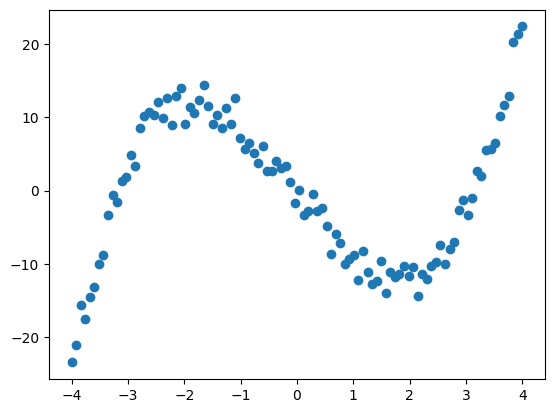

In [5]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)
plt.scatter(x, y)

#### rescaling data

In [8]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x)

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


In [9]:
x.dtype

dtype('float64')

####  x e y são convertidos do tensor do numpy para o tensor do torch

In [11]:
x, y = torch.from_numpy(x).float(), torch.from_numpy(y).float()

#### NA AULA PASSADA USAMOS O L1LOSS QUE É EQUIVALENTE AO MAE

# 2 - BUILD MODEL

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(in_features=1, out_features=30)
        self.dense1 = nn.Linear(30, 30)
        self.output = nn.Linear(30, 1)
        self.relu   = nn.ReLU()
        self.tanh   = nn.Tanh()

    def forward(self, x):
        # 1 camada
        x = self.dense0(x) #  1 -> 30
        x = self.relu(x)
        # 2 camada
        x = self.relu(self.dense1(x)) # 30 -> 30
        # 3 camada
        out = self.output(x)
        return out

model_2 = NeuralNetwork() # create instance
model_2.to(device)        # set model to GPU

NeuralNetwork(
  (dense0): Linear(in_features=1, out_features=30, bias=True)
  (dense1): Linear(in_features=30, out_features=30, bias=True)
  (output): Linear(in_features=30, out_features=1, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
)

In [17]:
# cost function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001)

In [18]:
torch.manual_seed(42)
epochs = 5000
x = x.to(device)
y = y.to(device)

for epoch in range(epochs):
    model_2.train()
    # 1 forward
    y_pred = model_2(x)
    # 2 calc loss
    loss = criterion(y_pred, y)
    # 3 zero grad
    optimizer.zero_grad()
    # 4 loss backward
    loss.backward()
    # 5 step optim
    optimizer.step()

    if epoch % 500 == 0:
        print( f"Epoch: {epoch} Train_loss: {loss}" )

Epoch: 0 Train_loss: 101.60286712646484
Epoch: 500 Train_loss: 97.64185333251953
Epoch: 1000 Train_loss: 52.63125991821289
Epoch: 1500 Train_loss: 4.922182083129883
Epoch: 2000 Train_loss: 2.7527084350585938
Epoch: 2500 Train_loss: 2.5920586585998535
Epoch: 3000 Train_loss: 2.5741095542907715
Epoch: 3500 Train_loss: 2.5667788982391357
Epoch: 4000 Train_loss: 2.5615105628967285
Epoch: 4500 Train_loss: 2.5569121837615967


#### temos que usar .cpu() para trazer o valor de x da GPU de volta para a CPU para que possamos fazer o plot

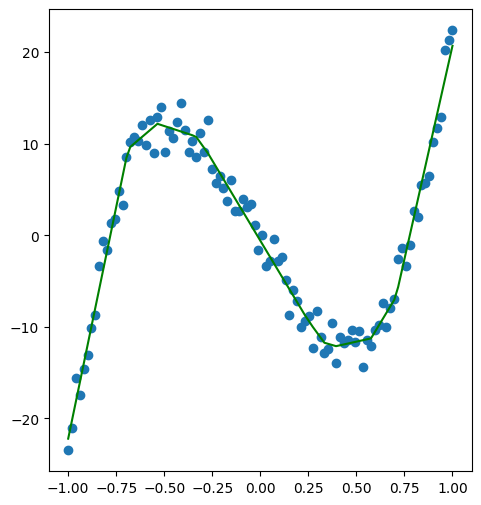

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(x.cpu(), y.cpu())
plt.plot(x.cpu(), model_2(x).cpu().detach().numpy(), c='green')

# Regressão venda de vídeo games

Trabalhando com múltiplos previsores

In [24]:
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
base = pd.read_csv('games.csv')

In [27]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
base.shape

(16719, 16)

In [29]:
base  = base.drop("Other_Sales", axis = 1)
base  = base.drop("Global_Sales", axis = 1)
base  = base.drop("Developer", axis = 1)

In [30]:
base.shape

(16719, 13)

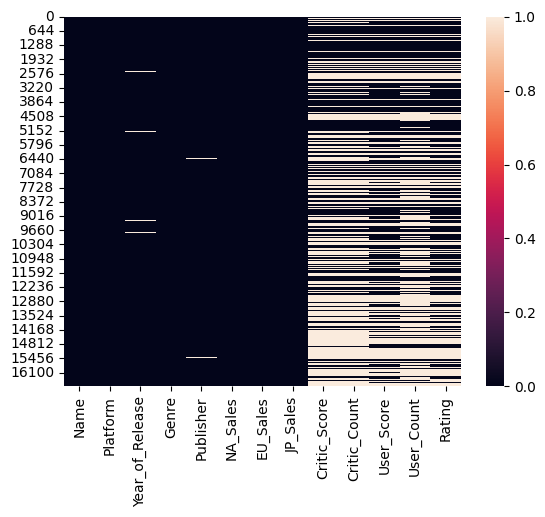

In [32]:
sns.heatmap(base.isnull());

In [33]:
# dropa vazios em linha
base = base.dropna(axis = 0)

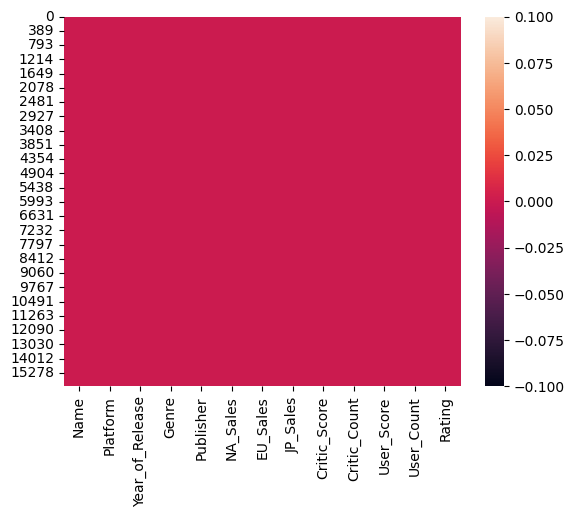

In [34]:
sns.heatmap(base.isnull());

In [35]:
base.shape

(6825, 13)

In [39]:
base.loc[base['NA_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,NCAA Football 14,X360,2013.0,Sports,Electronic Arts,1.01,0.00,0.00,77.0,18.0,5.8,74.0,E
1877,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.00,97.0,22.0,6,47.0,E
1881,Madden NFL 2004,XB,2003.0,Sports,Electronic Arts,1.02,0.02,0.00,92.0,27.0,8.3,48.0,E
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,76.0,20.0,5.5,65.0,E


In [40]:
base = base.loc[base['NA_Sales'] > 1]

In [41]:
base.loc[base['EU_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Medal of Honor,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,Tom Clancy's Splinter Cell,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [42]:
base = base.loc[base['EU_Sales'] > 1]

In [43]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E


In [47]:
base['Name'].value_counts()

Grand Theft Auto V                 4
Assassin's Creed IV: Black Flag    3
Call of Duty: Ghosts               3
Battlefield 4                      3
The Elder Scrolls V: Skyrim        3
                                  ..
Tekken 2                           1
Destiny                            1
Cooking Mama                       1
Forza Motorsport 3                 1
The Sims: Bustin' Out              1
Name: Name, Length: 223, dtype: int64

In [81]:
base = base.drop('Name', axis = 1)

In [82]:
base.shape

(258, 12)

In [83]:
base.iloc[:, [1, 2]]

,Year_of_Release,Genre
0,2006.0,Sports
2,2008.0,Racing
3,2009.0,Sports
6,2006.0,Platform
7,2006.0,Misc
...,...,...
568,1998.0,Shooter
573,2003.0,Action
591,2007.0,Sports
610,2001.0,Racing


In [93]:
base.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E


In [84]:
# selecionando as features
previsores = base.iloc[:, [0,1,2,3,7,8,9,10,11]].values
vendas = base.iloc[:, 4:7].values

In [ ]:
previsores

In [ ]:
vendas

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(
    transformers=[("OneHot",
    OneHotEncoder(), [0, 2, 3, 8])],
    remainder='passthrough')

previsores = onehotencoder.fit_transform(previsores).toarray()

In [94]:
previsores.shape, vendas.shape

((258, 61), (258, 3))

# calculando quantas entradas em cada camada devemos definir

### usamos os valores de shape/dimensão
###((258, 61), (258, 3))

### 61 + 3 / 2 -> 32 => ((input_dim + output_dim) / 2)
### 61 -> 32 -> 32 -> 3

In [96]:
class regressor_torch(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(61, 32)
        self.dense1 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 3)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.dense0(x)
        x = self.activation(x)
        x = self.dense1(x)
        x = self.activation(x)
        out = self.output(x)
        return out

In [97]:
regressor = regressor_torch()

In [98]:
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())


In [99]:
type(previsores)

numpy.ndarray

In [100]:
previsores = torch.tensor(previsores, dtype=torch.float)
vendas = torch.tensor(vendas, dtype=torch.float)


In [101]:
type(previsores)

torch.Tensor

### Criando uma estrutura para o pytorch usar os dados como entrada

In [102]:
dataset = torch.utils.data.TensorDataset(previsores, vendas)

# divide a base de dados em lotes de tamanho 10
train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=10,
                                           shuffle=True)

In [104]:
dataset, train_loader

(<torch.utils.data.dataset.TensorDataset at 0x7d0dcf4c44f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0dcf4c5570>)

# 3 TRAIN THE MODEL

In [105]:
regressor.to(device)

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=3, bias=True)
  (activation): Sigmoid()
)

In [109]:
for epoch in range(5000):
    regressor.train()
    running_loss = 0. #Totaol loss
    running_mse_0 = 0. # NA
    running_mse_1 = 0. #EU
    running_mse_2 = 0. #JP

    # itera sobre os valores de cada lote_tamano_10 (train_loader)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        y_pred = regressor(inputs)

        # Medindo os erros por cada variável predita
        mse_0 = F.mse_loss(y_pred[:, 0], labels[:, 0]).item()
        mse_1 = F.mse_loss(y_pred[:, 1], labels[:, 1]).item()
        mse_2 = F.mse_loss(y_pred[:, 2], labels[:, 2]).item()

        # erro das amostras somente para visualização
        running_mse_0 += mse_0 * len(inputs)
        running_mse_1 += mse_1 * len(inputs)
        running_mse_2 += mse_2 * len(inputs)

        loss = criterion(y_pred, labels)
        loss.backward()

        optimizer.step()
        loss = loss.item()
        running_loss += loss * len(inputs)

        if i % 500 == 0:
            print(f"Epoch: {epoch}" +
                f"NA_erro: {running_mse_0/len(dataset)} \n"+
                f"EU_erro: {running_mse_1/len(dataset)}" +
                f"JP_erro: {running_mse_2/len(dataset)}" +
                f"loss: {running_loss/len(dataset)}")

Streaming output truncated to the last 5000 lines.
Epoch: 2500NA_erro: 6.016594938529554 
EU_erro: 3.0318459799123363JP_erro: 0.10527677314226018loss: 3.0512394276700276
Epoch: 2501NA_erro: 0.06910115711448729 
EU_erro: 0.09229019630786985JP_erro: 0.007391391220942949loss: 0.05626091199327809
Epoch: 2502NA_erro: 0.13039995533551357 
EU_erro: 0.030552102613818737JP_erro: 0.010512507008027661loss: 0.05715485229048618
Epoch: 2503NA_erro: 0.06447629411091176 
EU_erro: 0.037001322868258454JP_erro: 0.013391403264777606loss: 0.03828967726507852
Epoch: 2504NA_erro: 0.08364950039590052 
EU_erro: 0.034389253272566686JP_erro: 0.11041191197180933loss: 0.07615022419034972
Epoch: 2505NA_erro: 0.48777997955795405 
EU_erro: 0.23252744083256685JP_erro: 0.1217773995658224loss: 0.28069496154785156
Epoch: 2506NA_erro: 0.15274712281633718 
EU_erro: 0.1043248361395311JP_erro: 0.008494475091150564loss: 0.08852215700371321
Epoch: 2507NA_erro: 5.702870095423026 
EU_erro: 2.776956188586331JP_erro: 0.04704763722

In [110]:
regressor.eval()

regressor_torch(
  (dense0): Linear(in_features=61, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=3, bias=True)
  (activation): Sigmoid()
)

In [111]:
previsores = previsores.to(device)
y_preds = regressor(previsores)

In [112]:
y_preds = y_preds.cpu().detach().numpy()

In [113]:
y_preds.mean(axis = 0)

array([3.2711465, 2.336537 , 0.5838735], dtype=float32)

In [114]:
vendas.mean(axis = 0)

tensor([3.2838, 2.3505, 0.5862])

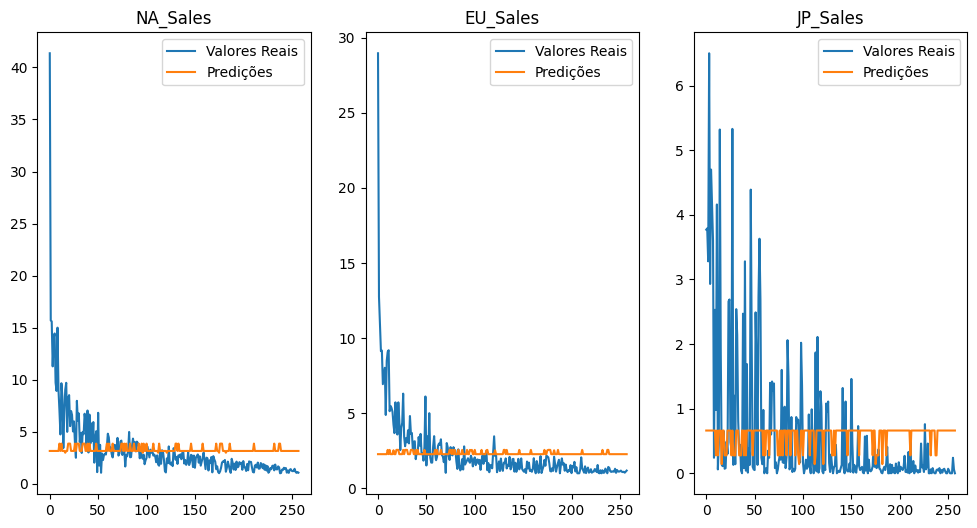

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

for i in range(3):
    ax[i].plot(vendas[:, i])
    ax[i].plot(y_preds[:, i])
    ax[i].legend(['Valores Reais', 'Predições'])
    ax[i].set_title(base.columns[4 + i])